In [ ]:
#download all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from IPython.display import Image
from sklearn import tree
from os import system
from google.colab import drive

In [ ]:
# Drive mount
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data credit data from file.
# Data source is https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

backpainData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv-files/backpain.csv')

In [ ]:
backpainData.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [ ]:
backpainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


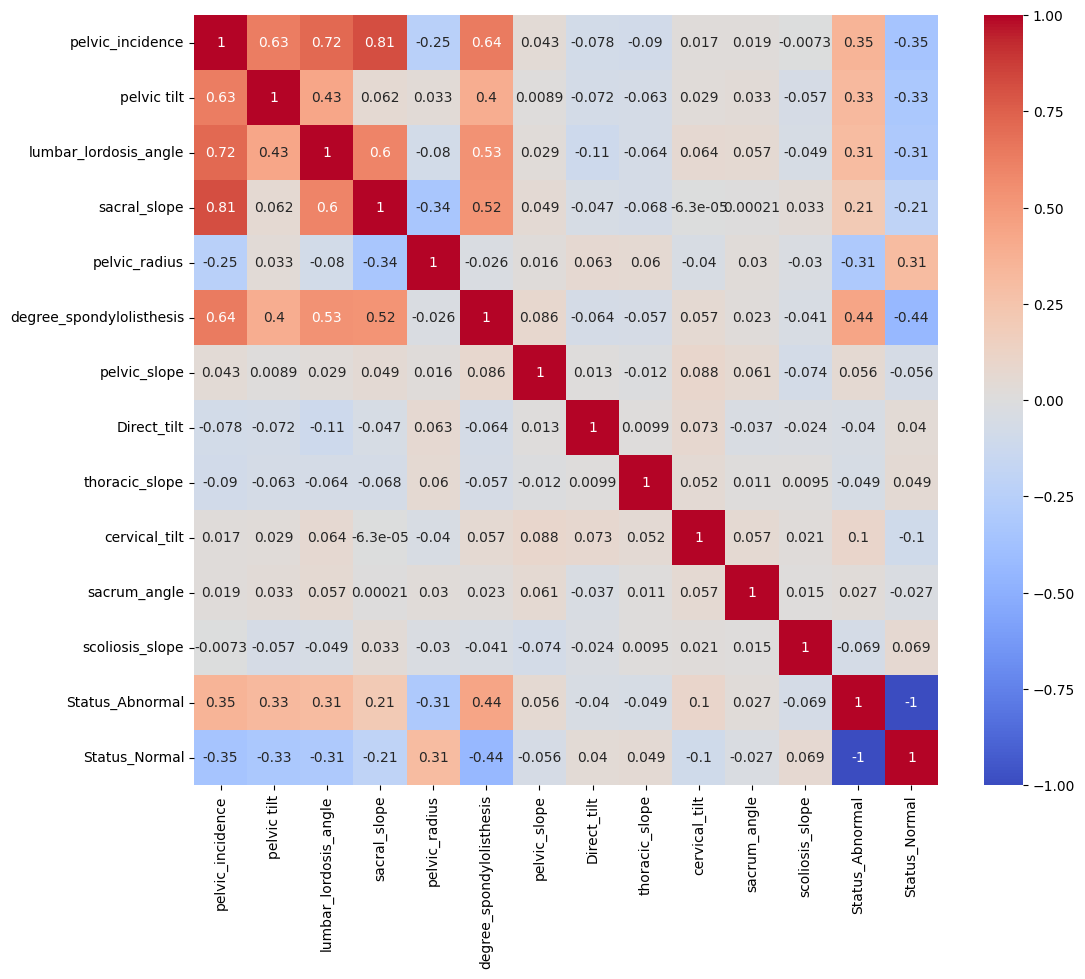

In [ ]:
# Perform one-hot encoding
df = pd.get_dummies(backpainData, columns=['Status'])

plt.figure(figsize=(12,10))
correlationMatrix= df.corr()
sns.heatmap(correlationMatrix, annot=True,cmap='coolwarm')
plt.show()

In [ ]:
# Create a label encoder
le = LabelEncoder()

# copy to df
df = backpainData.copy()

# Fit and transform the Status column
# df['Status'] = le.fit_transform(df['Status'])

# Encoding the target variable
df['Status'] = df['Status'].apply(lambda x: 1 if x=='Abnormal' else 0)

# Split the data into a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(df.drop('Status', axis=1), df['Status'], test_size=0.3, random_state=1)

# Calculate the percentage of 0 and 1 classes in the train data
percentage_0 = (y_train == 0).sum() / len(y_train) * 100
percentage_1 = (y_train == 1).sum() / len(y_train) * 100

print(f"Percentage of 0 class: {percentage_0}%")
print(f"Percentage of 1 class: {percentage_1}%")

# Calculate the percentage of 0 and 1 classes in the train data
percentage_0 = (y_train == 0).sum() / len(y_train) * 100
percentage_1 = (y_train == 1).sum() / len(y_train) * 100

# Round to the nearest 10
range_0 = round(percentage_0 / 10) * 10
range_1 = round(percentage_1 / 10) * 10

print(f"Range of 0 class: {range_0 - 10}% to {range_0}%")
print(f"Range of 1 class: {range_1 - 10}% to {range_1}%")

value = y_train.value_counts()
print(value)

#Getting the percentages
y_train.value_counts(normalize=True)

Percentage of 0 class: 33.6405529953917%
Percentage of 1 class: 66.3594470046083%
Range of 0 class: 20% to 30%
Range of 1 class: 60% to 70%
Status
1    144
0     73
Name: count, dtype: int64


Status
1    0.663594
0    0.336406
Name: proportion, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

# Initialize the best_recall and best_depth
best_recall = 0
best_depth = 0

# Loop over depths from 1 to 8
for depth in range(1, 9):
    # Train a decision tree model
    model = DecisionTreeClassifier(max_depth=depth, criterion = 'gini', random_state=1)
    model.fit(X_train, y_train)

    # Make predictions on the training set
    predictions = model.predict(X_train)

    # Calculate the recall
    recall = recall_score(y_train, predictions)

    # If this recall is better than the best_recall seen so far,
    # update best_recall and best_depth
    if recall > best_recall:
        best_recall = recall
        best_depth = depth

print(f"The highest recall among all the models on the training set is {best_recall} at depth = {best_depth}.")


The highest recall among all the models on the training set is 1.0 at depth = 8.


In [ ]:
X = backpainData.drop("Status" , axis=1)
y = backpainData.pop("Status")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y.value_counts(1)

Status
Abnormal    0.677419
Normal      0.322581
Name: proportion, dtype: float64

In [ ]:
feature_names = X.columns
print(feature_names)


Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope'],
      dtype='object')


In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth=8)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

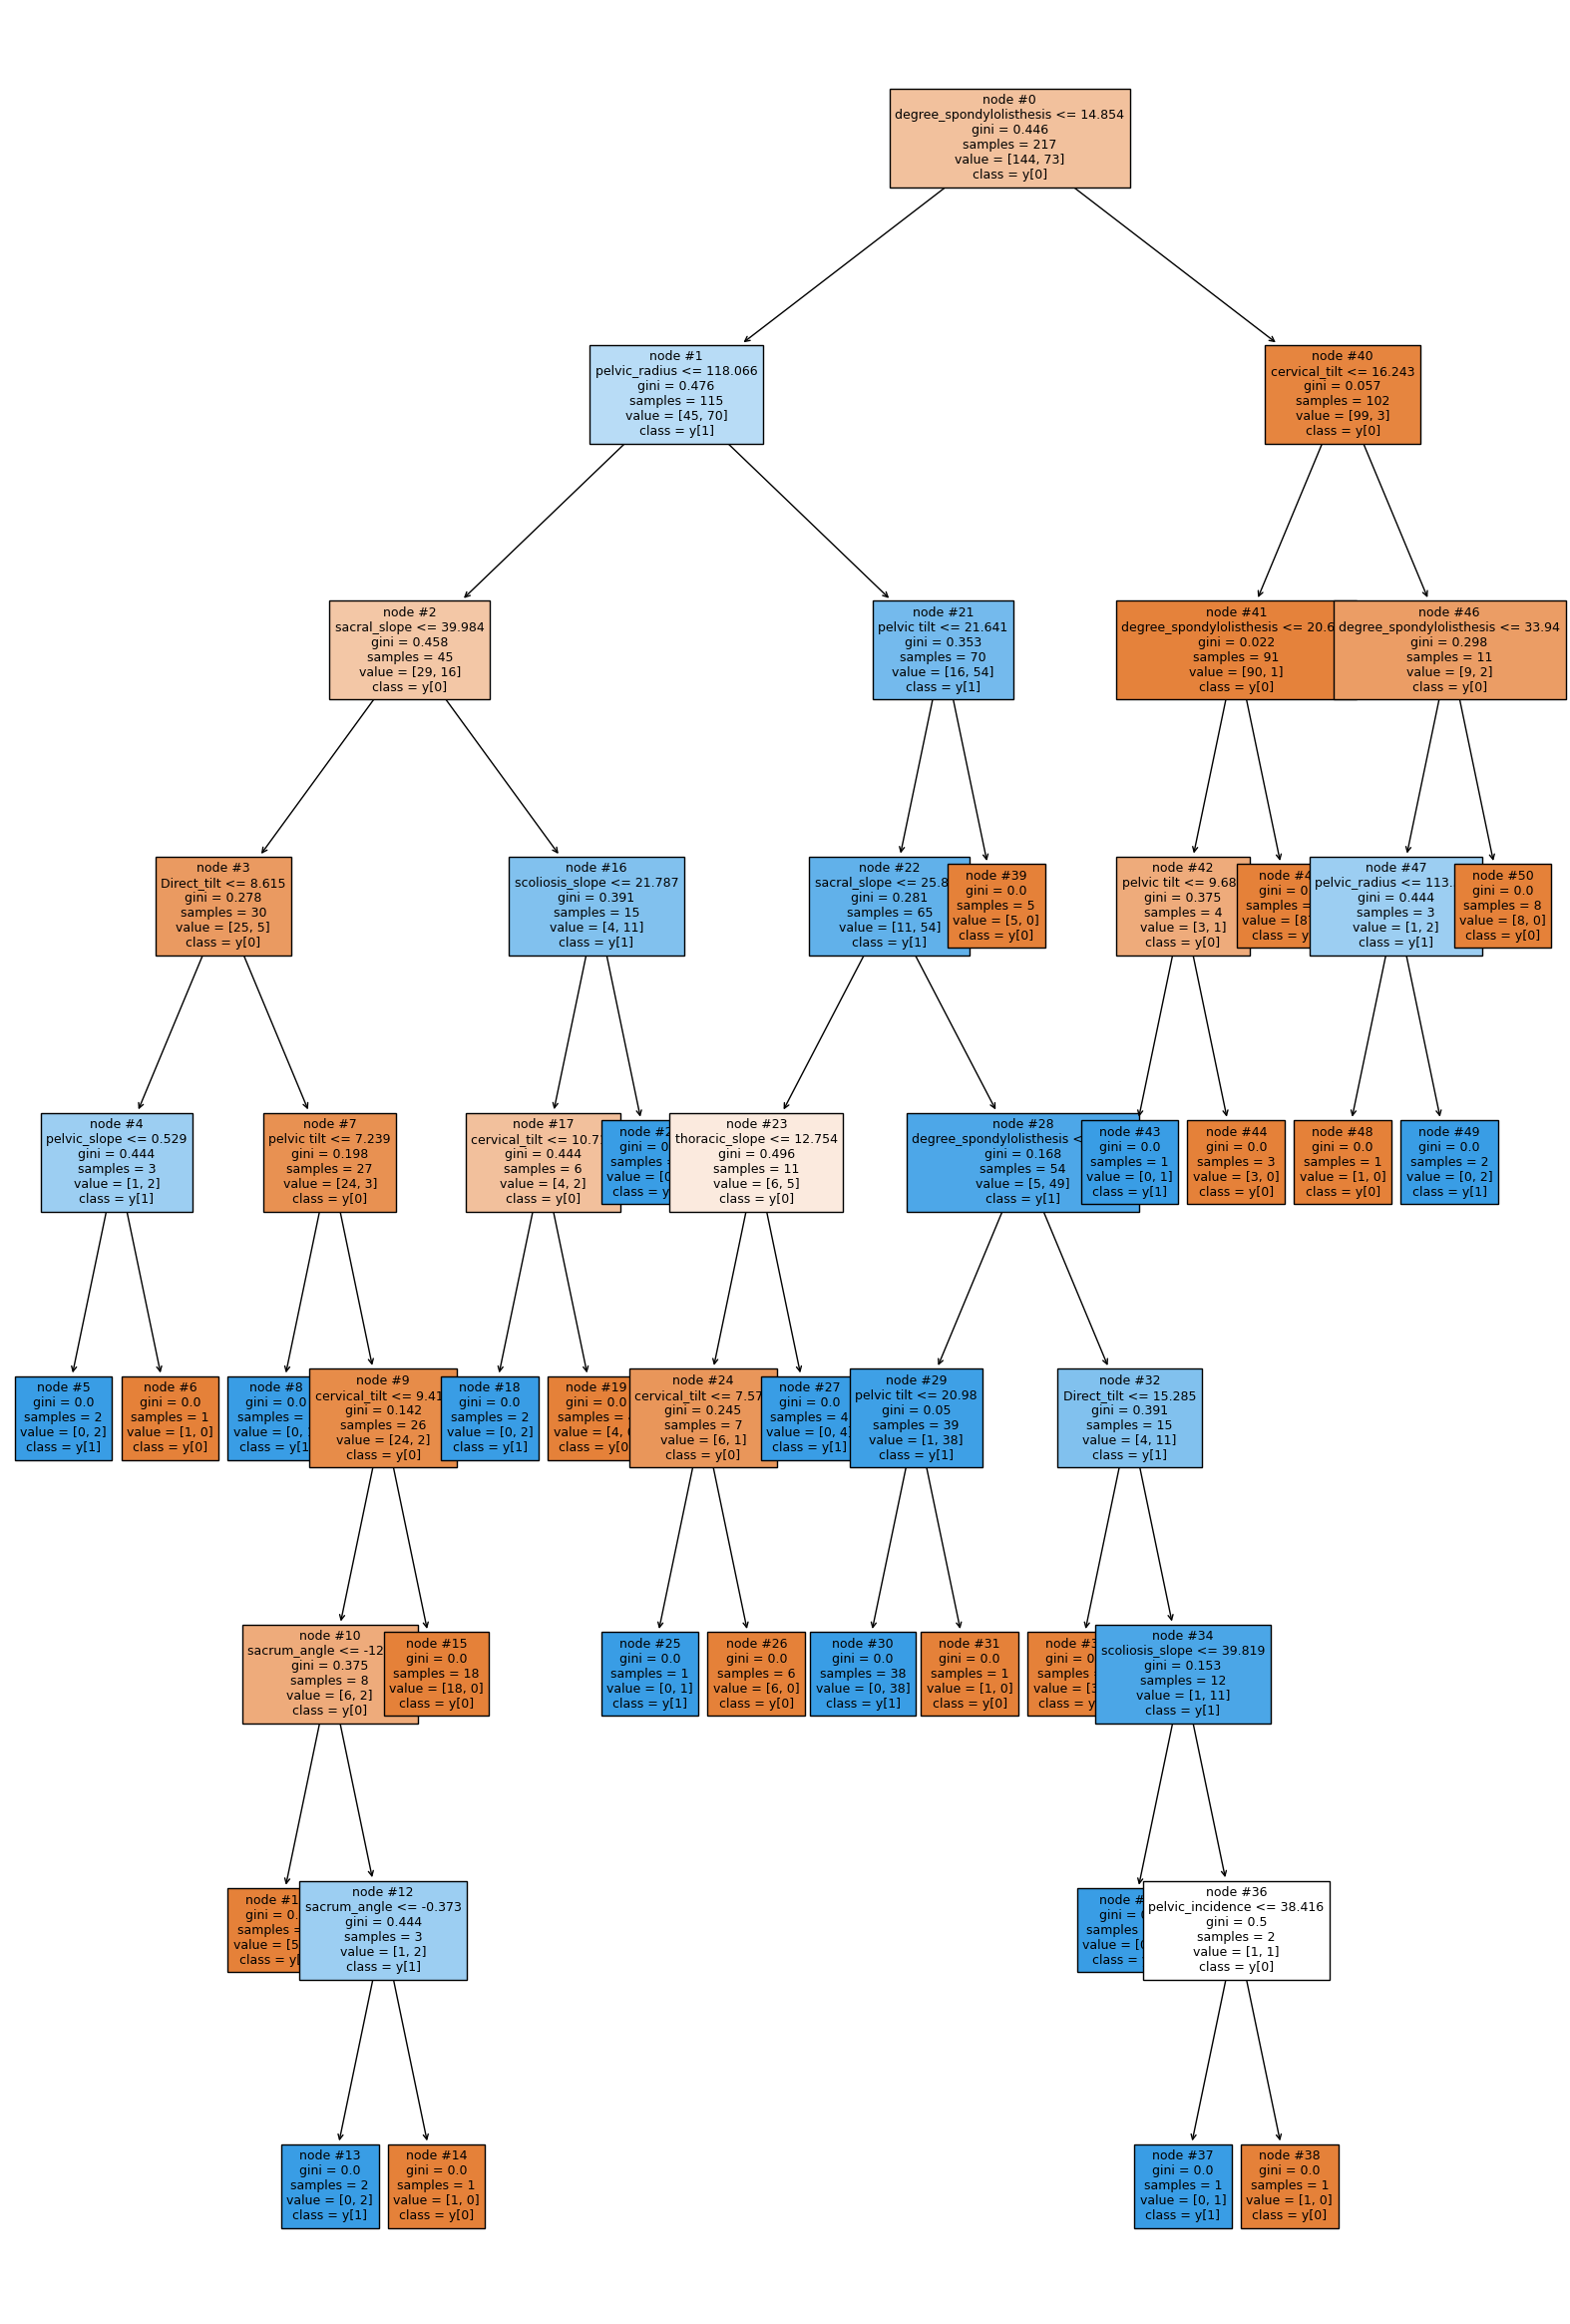

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=list(feature_names),show_weights=True))

|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 118.07
|   |   |--- sacral_slope <= 39.98
|   |   |   |--- Direct_tilt <= 8.62
|   |   |   |   |--- pelvic_slope <= 0.53
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- pelvic_slope >  0.53
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- Direct_tilt >  8.62
|   |   |   |   |--- pelvic tilt <= 7.24
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- pelvic tilt >  7.24
|   |   |   |   |   |--- cervical_tilt <= 9.42
|   |   |   |   |   |   |--- sacrum_angle <= -12.82
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- sacrum_angle >  -12.82
|   |   |   |   |   |   |   |--- sacrum_angle <= -0.37
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- sacrum_angle >  -0.37
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |---

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
degree_spondylolisthesis  0.412395
pelvic tilt               0.118683
pelvic_radius             0.111555
sacral_slope              0.104975
Direct_tilt               0.058833
cervical_tilt             0.058276
scoliosis_slope           0.041630
thoracic_slope            0.038605
sacrum_angle              0.030965
pelvic_slope              0.013762
pelvic_incidence          0.010322
lumbar_lordosis_angle     0.000000


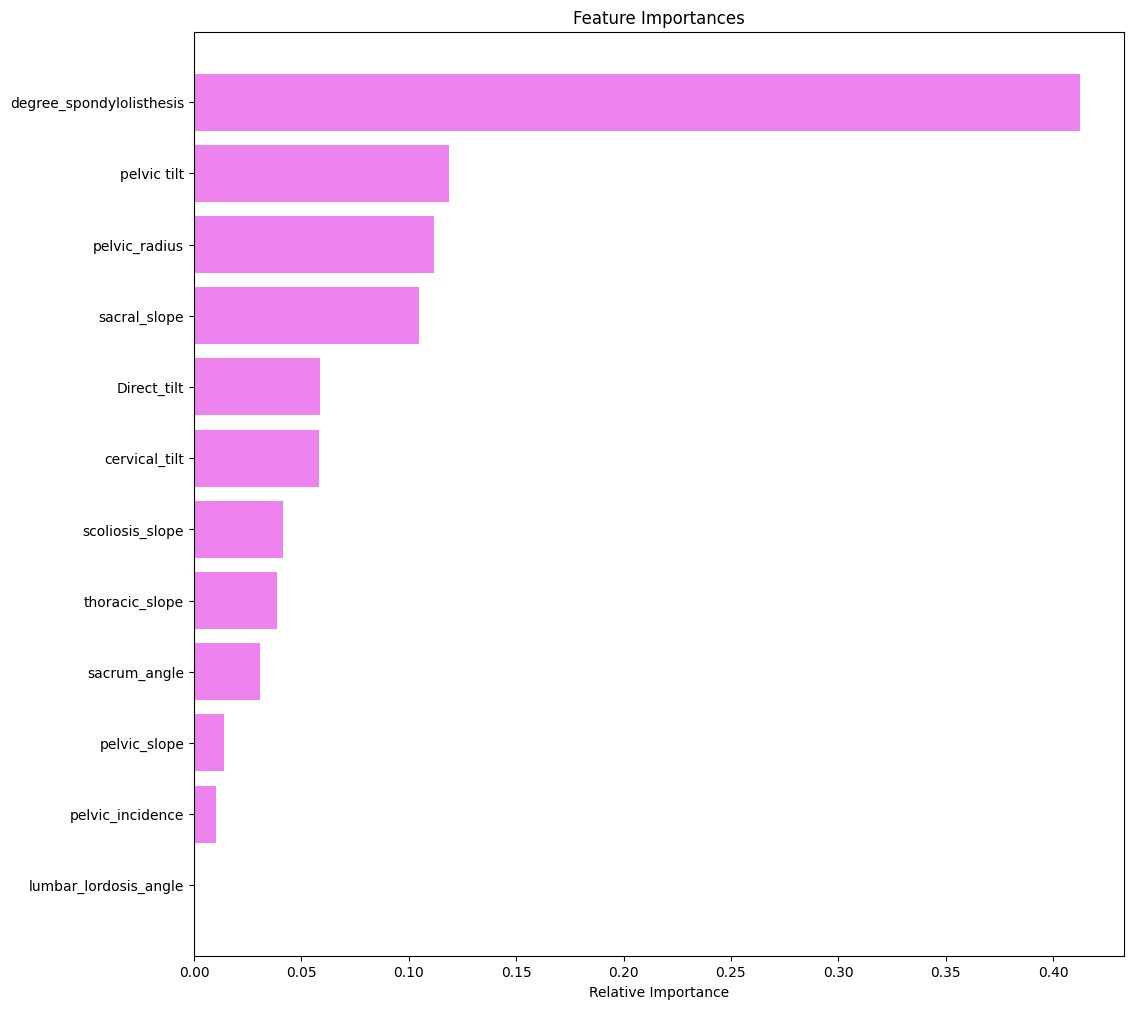

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(5,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)



In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='recall')

# Fit the grid search
grid_search.fit(X_train, y_train)

grid_search.best_params_


{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score

# Create a decision tree with default parameters
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

# Make predictions on the test set
predictions_default = dt_default.predict(X_test)

# Calculate the recall and F1 score for the default model
recall_default = recall_score(y_test, predictions_default)
f1_default = f1_score(y_test, predictions_default)

# Create a decision tree with the best parameters
dt_tuned = DecisionTreeClassifier(max_depth=5, criterion='entropy', splitter='best')
dt_tuned.fit(X_train, y_train)

# Make predictions on the test set
predictions_tuned = dt_tuned.predict(X_test)

# Calculate the recall and F1 score for the tuned model
recall_tuned = recall_score(y_test, predictions_tuned)
f1_tuned = f1_score(y_test, predictions_tuned)

# Print the scores
print(f"Default model - Recall: {recall_default}, F1: {f1_default}")
print(f"Tuned model - Recall: {recall_tuned}, F1: {f1_tuned}")


Default model - Recall: 0.7777777777777778, F1: 0.7000000000000001
Tuned model - Recall: 0.7037037037037037, F1: 0.6909090909090909
